# Deconvolving the Mixing Matrix

The goal of this notebook is showcase the natural unmixing method to account for masking in the fields implemented in Heracles.


In [1]:
import heracles
import numpy as np
import heracles.healpy
from heracles.result import Result

import matplotlib.pyplot as plt
from heracles.notebook import Progress

import helpers

with Progress("example data") as progress:
    helpers.get_example_data(progress)

VBox()

In [2]:
def plot_clustering(cls, theory):
    bins = [key[3] for key in cls.keys()]
    nbins = max(bins) + 1
    fig, ax = plt.subplots(
        nbins - 1, nbins - 1, figsize=(6, 6), sharex=True, sharey=True
    )

    for i in range(1, nbins):
        for j in range(1, i):
            ax[j - 1, i - 1].axis("off")
        for j in range(i, nbins):
            ax[j - 1, i - 1].plot(
                cls["POS", "POS", i, j].ell[1:],
                cls["POS", "POS", i, j][1:],
                c="C0",
                lw=1.5,
                zorder=3.0,
                alpha=0.5,
            )
            ax[j - 1, i - 1].plot(
                theory["POS", "POS", i, j].ell[1:],
                theory["POS", "POS", i, j][1:],
                c="C0",
                lw=1.0,
                zorder=4.0,
            )
            ax[j - 1, i - 1].axhline(0.0, c="k", lw=0.8, zorder=-1)
            ax[j - 1, i - 1].tick_params(axis="both", which="both", direction="in")

    ax[0, 0].set_xscale("log")
    ax[0, 0].set_xlim(1 / 3, lmax * 3)
    ax[0, 0].xaxis.get_major_locator().set_params(numticks=99)
    ax[0, 0].xaxis.get_minor_locator().set_params(
        numticks=99, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_yscale(
        "symlog", linthresh=1e-7, linscale=0.45, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_ylim(-2e-7, 2e-4)

    fig.subplots_adjust(
        left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0
    )

    fig.supxlabel("angular mode $\\ell$", y=-0.05, va="top")
    fig.supylabel("galaxy clustering $C_\\ell$", x=-0.1, ha="right")

    plt.show()
    return fig


def plot_shear(cls, theory):
    bins = [key[3] for key in cls.keys()]
    nbins = max(bins) + 1
    fig, ax = plt.subplots(
        nbins - 1, nbins - 1, figsize=(6, 6), sharex=True, sharey=True
    )

    for i in range(1, nbins):
        for j in range(1, i):
            ax[j - 1, i - 1].axis("off")
        for j in range(i, nbins):
            ax[j - 1, i - 1].plot(
                cls["SHE", "SHE", i, j].ell[2:],
                cls["SHE", "SHE", i, j][0, 0, 2:],
                c="C0",
                lw=1.5,
                zorder=3.0,
                alpha=0.5,
            )
            ax[j - 1, i - 1].plot(
                theory["SHE", "SHE", i, j].ell[2:],
                theory["SHE", "SHE", i, j][0, 0, 2:],
                c="C0",
                lw=1.0,
                zorder=4.0,
            )
            ax[j - 1, i - 1].plot(
                cls["SHE", "SHE", i, j].ell[2:],
                cls["SHE", "SHE", i, j][1, 1, 2:],
                c="C1",
                lw=1.5,
                zorder=1.0,
                alpha=0.5,
            )
            ax[j - 1, i - 1].plot(
                theory["SHE", "SHE", i, j].ell[2:],
                theory["SHE", "SHE", i, j][1, 1, 2:],
                c="C1",
                lw=1.0,
                zorder=2.0,
            )
            ax[j - 1, i - 1].axhline(0.0, c="k", lw=0.8, zorder=-1)
            ax[j - 1, i - 1].tick_params(axis="both", which="both", direction="in")

    ax[0, 0].set_xscale("log")
    ax[0, 0].set_xlim(1 / 3, lmax * 3)
    ax[0, 0].xaxis.get_major_locator().set_params(numticks=99)
    ax[0, 0].xaxis.get_minor_locator().set_params(
        numticks=99, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_yscale(
        "symlog", linthresh=1e-10, linscale=0.45, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_ylim(-3e-10, 5e-7)

    fig.subplots_adjust(
        left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0
    )

    fig.supxlabel("angular mode $\\ell$", y=-0.05, va="top")
    fig.supylabel("cosmic shear $C_\\ell$", x=-0.1, ha="right")

    plt.show()
    return fig


def plot_clusteringxshear(cls, theory):
    bins = [key[3] for key in cls.keys()]
    nbins = max(bins) + 1
    fig, ax = plt.subplots(
        nbins - 1, nbins - 1, figsize=(6, 6), sharex=True, sharey=True
    )

    for i in range(1, nbins):
        for j in range(1, nbins):
            ax[j - 1, i - 1].plot(
                cls["POS", "SHE", i, j].ell[2:],
                cls["POS", "SHE", i, j][0, 2:],
                c="C0",
                lw=1.5,
                zorder=3.0,
                alpha=0.5,
            )
            ax[j - 1, i - 1].plot(
                theory["POS", "SHE", i, j].ell[2:],
                theory["POS", "SHE", i, j][0, 2:],
                c="C0",
                lw=1.0,
                zorder=4.0,
            )
            ax[j - 1, i - 1].plot(
                cls["POS", "SHE", i, j].ell[2:],
                cls["POS", "SHE", i, j][1, 2:],
                c="C1",
                lw=1.5,
                zorder=1.0,
                alpha=0.5,
            )
            ax[j - 1, i - 1].plot(
                theory["POS", "SHE", i, j].ell[2:],
                theory["POS", "SHE", i, j][1, 2:],
                c="C1",
                lw=1.0,
                zorder=2.0,
            )
            ax[j - 1, i - 1].axhline(0.0, c="k", lw=0.8, zorder=-1)
            ax[j - 1, i - 1].tick_params(axis="both", which="both", direction="in")

    ax[0, 0].set_xscale("log")
    ax[0, 0].set_xlim(1 / 3, lmax * 3)
    ax[0, 0].xaxis.get_major_locator().set_params(numticks=99)
    ax[0, 0].xaxis.get_minor_locator().set_params(
        numticks=99, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_yscale(
        "symlog", linthresh=1e-9, linscale=0.45, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_ylim(-8e-6, 4e-8)

    fig.subplots_adjust(
        left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0
    )

    fig.supxlabel("angular mode $\\ell$", y=-0.05, va="top")
    fig.supylabel("galaxy--galaxy lensing $C_\\ell$", x=-0.1, ha="right")

    plt.show()

## Load in Cls

We will reuse the Cls computed the general example notebook.

In [3]:
cls = heracles.read("./example-spectra.fits")
mask_cls = heracles.read("./example-mask-spectra.fits")

for key in cls.keys():
    print(key, cls[key].shape)

for key in mask_cls.keys():
    print(key, mask_cls[key].shape)

('POS', 'POS', 1, 1) (1501,)
('POS', 'SHE', 1, 1) (2, 1501)
('POS', 'POS', 1, 2) (1501,)
('POS', 'SHE', 1, 2) (2, 1501)
('POS', 'POS', 1, 3) (1501,)
('POS', 'SHE', 1, 3) (2, 1501)
('POS', 'POS', 1, 4) (1501,)
('POS', 'SHE', 1, 4) (2, 1501)
('POS', 'POS', 1, 5) (1501,)
('POS', 'SHE', 1, 5) (2, 1501)
('POS', 'POS', 1, 6) (1501,)
('POS', 'SHE', 1, 6) (2, 1501)
('SHE', 'SHE', 1, 1) (2, 2, 1501)
('POS', 'SHE', 2, 1) (2, 1501)
('SHE', 'SHE', 1, 2) (2, 2, 1501)
('POS', 'SHE', 3, 1) (2, 1501)
('SHE', 'SHE', 1, 3) (2, 2, 1501)
('POS', 'SHE', 4, 1) (2, 1501)
('SHE', 'SHE', 1, 4) (2, 2, 1501)
('POS', 'SHE', 5, 1) (2, 1501)
('SHE', 'SHE', 1, 5) (2, 2, 1501)
('POS', 'SHE', 6, 1) (2, 1501)
('SHE', 'SHE', 1, 6) (2, 2, 1501)
('POS', 'POS', 2, 2) (1501,)
('POS', 'SHE', 2, 2) (2, 1501)
('POS', 'POS', 2, 3) (1501,)
('POS', 'SHE', 2, 3) (2, 1501)
('POS', 'POS', 2, 4) (1501,)
('POS', 'SHE', 2, 4) (2, 1501)
('POS', 'POS', 2, 5) (1501,)
('POS', 'SHE', 2, 5) (2, 1501)
('POS', 'POS', 2, 6) (1501,)
('POS', 'SHE

In [4]:
# In the future it will not be necessary to trim the mask cls
# to the same lmax
nside = 1024
lmax = 1500

## Theory

For the time being we will recompute the full-sky theory although it is the same as in the general example notebook.

In [5]:
import camb
from camb.sources import SplinedSourceWindow

In [6]:
# nbins
nbins = 7

# cosmology for the simulation
h = 0.7
Oc = 0.25
Ob = 0.05

# set up CAMB parameters for matter angular power spectrum
pars = camb.set_params(
    H0=100 * h, omch2=Oc * h**2, ombh2=Ob * h**2, NonLinear=camb.model.NonLinear_both
)
pars.Want_CMB = False
pars.min_l = 1
pars.set_for_lmax(2 * lmax, lens_potential_accuracy=1);

In [7]:
with np.load("nz.npz") as npz:
    z, nz = npz["z"], npz["nz"]

In [8]:
sources = []
for i, nz_i in enumerate(nz):
    sources += [
        SplinedSourceWindow(source_type="counts", z=z, W=nz_i),
        SplinedSourceWindow(source_type="lensing", z=z, W=nz_i),
    ]
pars.SourceWindows = sources

In [9]:
results = camb.get_results(pars)
camb_cls = results.get_source_cls_dict(lmax=2 * lmax, raw_cl=True)

In [10]:
ell = np.arange(lmax + 1)
ell2 = np.arange(2 * lmax + 1)
fl = -np.sqrt((ell2 + 2) * (ell2 + 1) * ell2 * (ell2 - 1))
fl /= np.clip(ell2 * (ell2 + 1), 1, None)

In [11]:
theory = {}
for i in range(1, nbins):
    for j in range(i, nbins):
        # all mixing matrix combinations
        theory["POS", "POS", i, j] = camb_cls[f"W{2 * i - 1}xW{2 * j - 1}"]
        theory["POS", "SHE", i, j] = np.stack(
            [
                fl * camb_cls[f"W{2 * i - 1}xW{2 * j}"],
                np.zeros_like(ell2),
            ]
        )
        theory["POS", "SHE", j, i] = np.stack(
            [
                fl * camb_cls[f"W{2 * i}xW{2 * j - 1}"],
                np.zeros_like(ell2),
            ]
        )
        theory["SHE", "SHE", i, j] = np.stack(
            [
                [fl**2 * camb_cls[f"W{2 * i}xW{2 * j}"], np.zeros_like(ell2)],
                [np.zeros_like(ell2), np.zeros_like(ell2)],
            ]
        )

for key in theory.keys():
    c = cls[key]
    theory[key] = Result(theory[key], axis=c.axis, ell=ell2)

## Binning

In [12]:
nlbins = 10
ledges = np.logspace(np.log10(10), np.log10(lmax), nlbins + 1)
theory_q = heracles.binned(theory, ledges)

## Load in Cls

We will reuse the Cls computed the general example notebook.

In [13]:
cls = heracles.read("./example-spectra.fits")
theory = heracles.read("./example-theory.fits")
mask_cls = heracles.read("./example-mask-spectra.fits")
mms = heracles.read("./example-mixmats.fits")

for key in mask_cls.keys():
    mask_cls[key] = heracles.Result(
        mask_cls[key].array[: lmax + 1],
        axis=mask_cls[key].axis,
        spin=(0, 0),
    )

## NaturalSpice

In the nautral spice method we account for the effect of the mask in real space. 
Let's start laying down some definitions. Given a complex field:
$$ \gamma(n) = (Q \pm i U)(n) = \sum_{l m} (E_{l m} \mp i B_{l m}) _{\mp 2} Y_{l m}(n)  $$
we can define the correlators:
$$ \xi_{+} = \langle \gamma^* \gamma\rangle  \hspace{6pt}\rm{and}\hspace{6pt} \xi_{-} = \langle \gamma \gamma \rangle $$
Then the associated parital sky correlatiors are given by:
$$ \xi_{\pm}(\theta) = \frac{\tilde{\xi}_{\pm}(\theta)}{\xi^{ww'}(\theta)} $$
which we can also express in terms of linear combinations of the measured $E$ and $B$ angular power spectra:
$$  \tilde{\xi}_{\pm}(\theta) = \sum_l \frac{2l+1}{4\pi}(\tilde{C}^{EE}_l \pm  \tilde{C}^{BB}_l) d^l_{2 \pm 2}(\theta) $$

The natural spice method undoes the $E-B$ coupling by exploiting the simple relationship between the full- and partial sky correlation functions:
$$
\xi_{\pm}(\theta) = \frac{\tilde{\xi}_{\pm}(\theta)}{\xi^{ww'}(\theta)} = \nonumber \\ 
= \frac{1}{\xi^{ww'}(\theta)} \sum_l \frac{2l+1}{4\pi}(\tilde{C}^{EE}_l \pm  \tilde{C}^{BB}_l) d^l_{2 \pm 2}(\theta)
$$

Then one can construct a estimator for the full sky angular power spectra by inverting the SWSH transform:
$$
C^{EE}_l = 2\pi \int \frac{1}{2}[\xi_{+}(\theta) + \xi_{-}(\theta)] d^{l}_{22}(\theta) {\rm d}\!\cos{\theta} $$
$$
C^{BB}_l = 2\pi \int \frac{1}{2}[\xi_{+}(\theta) - \xi_{-}(\theta)] d^{l}_{2-2}(\theta) {\rm d}\!\cos{\theta} $$

It is often the case that $ \xi^{ww'}(\theta) $ is not invertible. This happens when themask completely obscures certain angular modes, leading to zeros in its correlation function that cannot be inverted. In this situations it is neccesary to apply a logistic correction to the mask correlation function. 
$$
 \xi^{ww'}(\theta) \leftarrow \xi^{ww'}(\theta) \left[ 1.0 + \exp(-k (\log_{10}(\xi^{ww'}(\theta)) - x_0)) \right]
$$
Doing so effectively throws away angular scales in the correlation fuction below a certain threshold. Determining the value of this threshold depends on the particular shape of the correlation function. Below we show a threshold that effectively removes the numerical instabilities in the inverse correlation function of the mask of our example notebook. 

In [14]:
from heracles.fields import Positions, Shears, Visibility, Weights

mapper = heracles.healpy.HealpixMapper(nside, lmax)
fields = {
    "POS": Positions(mapper, mask="VIS"),
    "SHE": Shears(mapper, mask="WHT"),
    "VIS": Visibility(mapper),
    "WHT": Weights(mapper),
}

In [37]:
xvals, _ = np.polynomial.legendre.leggauss(lmax + 1)
mask_wm = heracles.cl2corr(mask_cls)["VIS", "VIS", 1, 1][:]
mask_wm_corr = mask_wm * heracles.unmixing.logistic(
    np.log10(abs(mask_wm)),
    x0=np.log10(0.01 * np.max(mask_wm)),
)

Text(0, 0.5, '1 / mask correlation')

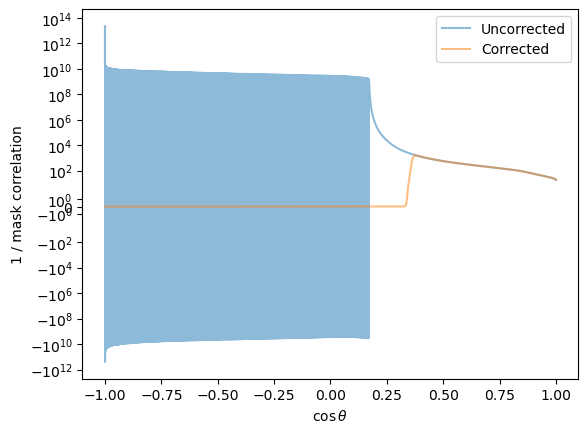

In [40]:
plt.plot(xvals, 1 / mask_wm, label="Uncorrected", alpha=0.5)
plt.plot(xvals, 1 / mask_wm_corr, label="Corrected", alpha=0.5)
plt.yscale("symlog")
plt.legend()
plt.xlabel(r"$\cos\theta$")
plt.ylabel("1 / mask correlation")

In [20]:
nu_d = heracles.naturalspice(cls, mask_cls, fields, rcond=0.01)
nu_dq = heracles.binned(nu_d, ledges)

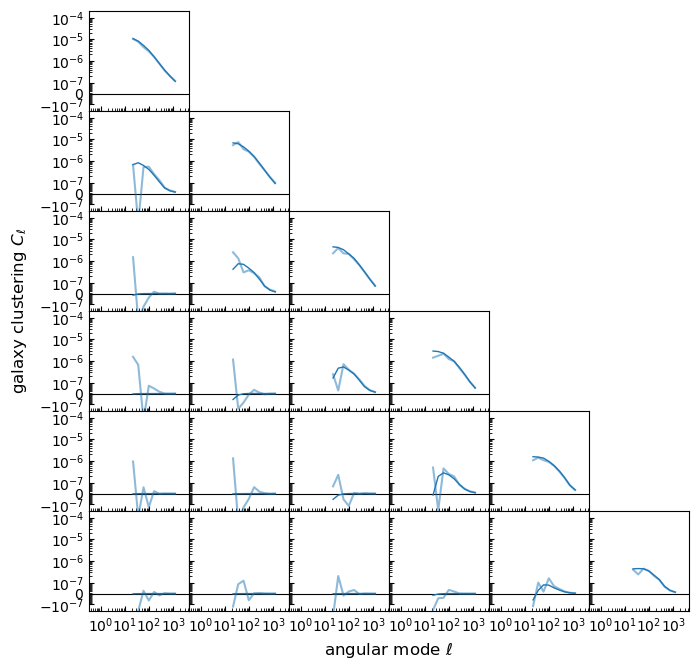

In [21]:
plot_clustering(nu_dq, theory_q);

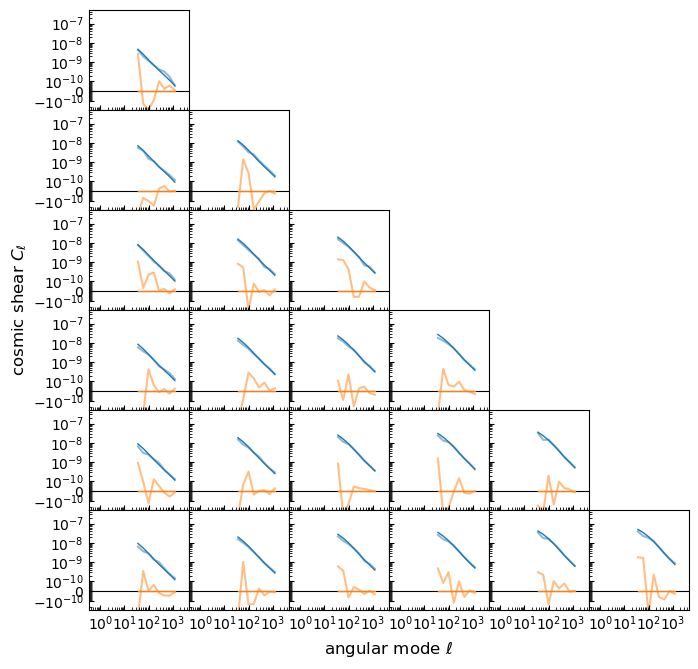

In [22]:
plot_shear(nu_dq, theory_q);

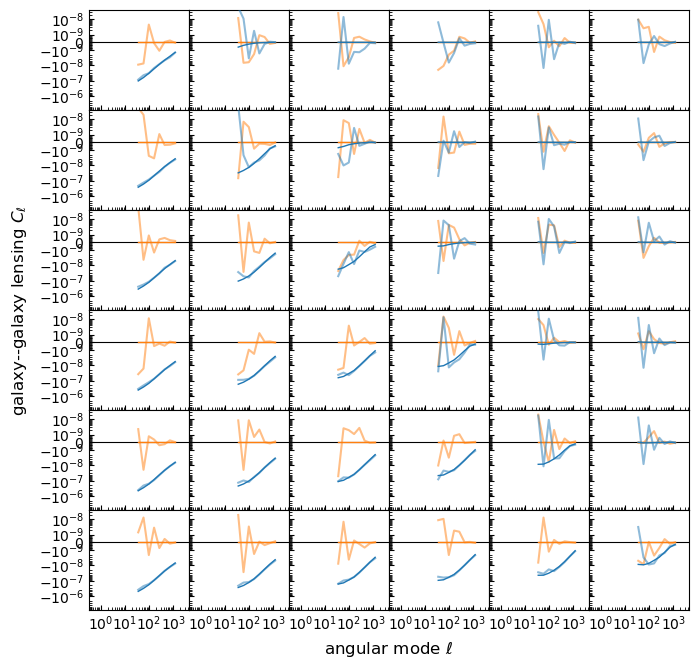

In [23]:
plot_clusteringxshear(nu_dq, theory_q);

## Direct Inversion

We can directly invert the mixing matrix and apply it to the masked Cls.

In [19]:
# This might take a while
with Progress("invert mixmats") as progress:
    inv_mms = heracles.invert_mixing_matrix(mms, progress=progress)

VBox()

KeyboardInterrupt: 

In [ ]:
um_cls = heracles.apply_mixing_matrix(cls, inv_mms)
um_cqs = heracles.binned(um_cls, ledges)

In [ ]:
plot_clustering(um_cqs, theory_q);

In [ ]:
plot_shear(um_cqs, theory_q);

In [ ]:
plot_clusteringxshear(um_cqs, theory_q);